In [1]:
import pandas as pd
import numpy as np

In [2]:
c19 = pd.read_csv("COVID-19.csv")
c19.head()

,Sno,age,gender,body temperature,Dry Cough,sour throat,weakness,breathing problem,drowsiness,pain in chest,...,diabetes,heart disease,lung disease,stroke or reduced immunity,symptoms progressed,high blood pressue,kidney disease,change in appetide,Loss of sense of smell,Corona result
0,1,20,1,98.6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,19,1,99.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,55,0,102.0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,1
3,4,40,0,100.0,0,0,0,0,1,1,...,1,0,0,0,1,1,0,1,0,2
4,5,33,1,99.2,0,1,0,1,0,0,...,0,0,1,1,1,0,0,0,1,2


In [14]:
c19.shape

(127, 21)

In [3]:
c19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Sno                                   127 non-null    int64  
 1   age                                   127 non-null    int64  
 2   gender                                127 non-null    int64  
 3   body temperature                      127 non-null    float64
 4   Dry Cough                             127 non-null    int64  
 5   sour throat                           127 non-null    int64  
 6   weakness                              127 non-null    int64  
 7   breathing problem                     127 non-null    int64  
 8   drowsiness                            127 non-null    int64  
 9   pain in chest                         127 non-null    int64  
 10  travel history to infected countries  127 non-null    int64  
 11  diabetes           

In [5]:
#categorizing the continuous variables age and temperature
bins= [0,10,20,55,100]
labels = ['Kids','Teen','Adult','Old Age']
Age = pd.cut(c19['age'], bins=bins, labels=labels, right=False)
c19["Age"]=Age
c19=c19.drop(['age'],axis=1)

bins= [96,98.6,102,110]
labels = ['normal','fever','high fever']
Temp = pd.cut(c19['body temperature'], bins=bins, labels=labels, right=False)
c19["Temp"]=Temp
c19=c19.drop(['body temperature'],axis=1)

c19.head()

,Sno,gender,Dry Cough,sour throat,weakness,breathing problem,drowsiness,pain in chest,travel history to infected countries,diabetes,...,lung disease,stroke or reduced immunity,symptoms progressed,high blood pressue,kidney disease,change in appetide,Loss of sense of smell,Corona result,Age,Temp
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Adult,fever
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Teen,fever
2,3,0,1,1,1,1,1,1,0,0,...,0,0,0,0,0,1,0,1,Old Age,high fever
3,4,0,0,0,0,0,1,1,1,1,...,0,0,1,1,0,1,0,2,Adult,fever
4,5,1,0,1,0,1,0,0,1,0,...,1,1,1,0,0,0,1,2,Adult,fever


In [6]:
print(c19['Age'].value_counts())
print(c19['Temp'].value_counts())

Adult      104
Old Age     16
Teen         7
Kids         0
Name: Age, dtype: int64
fever         85
high fever    29
normal        13
Name: Temp, dtype: int64


In [7]:
#applying label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
c19['Age'] = le.fit_transform(c19['Age'])
c19['Temp'] = le.fit_transform(c19['Temp'])

print(c19['Age'].value_counts())
print(c19['Temp'].value_counts())

0    104
1     16
2      7
Name: Age, dtype: int64
0    85
1    29
2    13
Name: Temp, dtype: int64


In [8]:
#splitting the inportant features to x and y

X =c19.drop(['Corona result' , 'Sno' , 'heart disease','kidney disease' , 'change in appetide' , 'lung disease' , 'weakness' ] , axis=1)
y = c19['Corona result']

In [154]:
#train and test split
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y , random_state = 1 , test_size = 0.20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(101, 14)
(101,)
(26, 14)
(26,)


# SVC 

In [155]:
from sklearn.svm import SVC

svc = SVC(C=1.0,
            kernel='rbf',
            degree=3,
            gamma='auto',
            coef0=0.0,
            shrinking=True,
            probability=False,
            tol=0.001,
            cache_size=200,
            class_weight=None,
            verbose=False,
            max_iter=-1,
            decision_function_shape='ovo',
            break_ties=False,
            random_state=None,)

In [156]:
svc.fit(x_train , y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [157]:
import matplotlib.pyplot as plt
%matplotlib inline

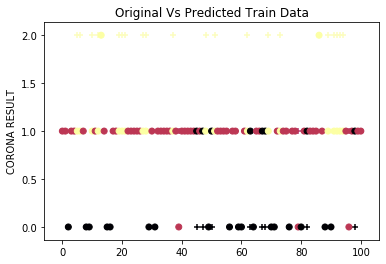

In [158]:
plt.scatter(range(101) , y_train , c = y_train , cmap ='magma',marker = '+' )
plt.scatter(range(101) , svc.predict(x_train) , c = y_train , cmap ='inferno',marker = 'o' )
plt.ylabel('CORONA RESULT')
plt.title('Original Vs Predicted Train Data')
plt.show()

In [159]:
#let us see how many values are not correctly predicted in trained data  
print((svc.predict(x_train)!= y_train).sum())

31


In [160]:
from sklearn.metrics import confusion_matrix , accuracy_score
print(confusion_matrix(y_train , svc.predict(x_train)))
print(accuracy_score(y_train , svc.predict(x_train)))

[[18  8  0]
 [ 3 50  0]
 [ 0 20  2]]
0.693069306930693


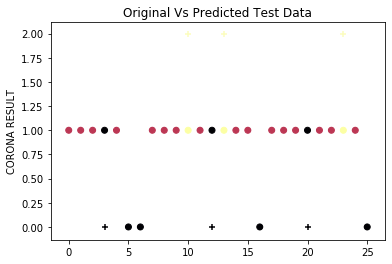

In [161]:
#Now let us see the prediction on testing data
plt.scatter(range(26) , y_test , c = y_test , cmap ='magma',marker = '+' )
plt.scatter(range(26) , svc.predict(x_test) , c = y_test , cmap ='inferno',marker = 'o' )
plt.ylabel('CORONA RESULT')
plt.title('Original Vs Predicted Test Data')
plt.show()

In [162]:
#let us see how many values are not correctly predicted in test data  
print((svc.predict(x_test)!= y_test).sum())

6


In [163]:
print(confusion_matrix(y_test , svc.predict(x_test)))
print(accuracy_score(y_test , svc.predict(x_test)))

[[ 4  3  0]
 [ 0 16  0]
 [ 0  3  0]]
0.7692307692307693


# Naive Bayes Classifier

In [164]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [165]:
nb.fit(x_train , y_train )

GaussianNB(priors=None, var_smoothing=1e-09)

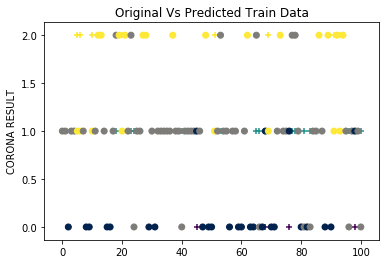

In [173]:
plt.scatter(range(101) , y_train , c = y_train , cmap ='viridis',marker = '+' )
plt.scatter(range(101) , nb.predict(x_train) , c = y_train , cmap ='cividis',marker = 'o' )
plt.ylabel('CORONA RESULT')
plt.title('Original Vs Predicted Train Data')
plt.show()

In [167]:
#let us see how many values are not correctly predicted in trained data  
print((nb.predict(x_train)!= y_train).sum())

25


In [169]:
from sklearn.metrics import confusion_matrix , accuracy_score
print(confusion_matrix(y_train , nb.predict(x_train)))
print(accuracy_score(y_train , nb.predict(x_train)))

[[22  4  0]
 [ 7 40  6]
 [ 0  8 14]]
0.7524752475247525


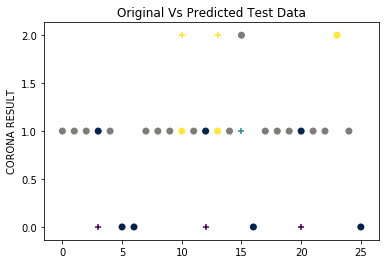

In [172]:
#Now let us see the prediction on testing data
plt.scatter(range(26) , y_test , c = y_test , cmap ='viridis',marker = '+' )
plt.scatter(range(26) , nb.predict(x_test) , c = y_test , cmap ='cividis',marker = 'o' )
plt.ylabel('CORONA RESULT')
plt.title('Original Vs Predicted Test Data')
plt.show()

In [174]:
#let us see how many values are not correctly predicted in test data  
print((nb.predict(x_test)!= y_test).sum())

6


In [175]:
print(confusion_matrix(y_test , nb.predict(x_test)))
print(accuracy_score(y_test , nb.predict(x_test)))

[[ 4  3  0]
 [ 0 15  1]
 [ 0  2  1]]
0.7692307692307693
